# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


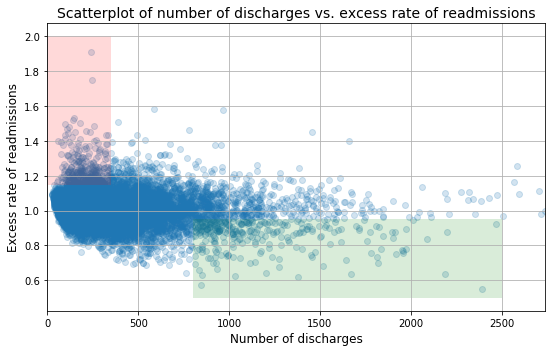

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not? 
<b>I do not agree with their analysis and recommendations for a few reasons. </b>
1. In cleaning the data, they only removed columns with the text "Not Available", they didn't check for nulls. 
2. They only provided an image to back their "findings", there was no statistical analysis done on the data.
3. There is no hypothesis stated.
4. The results are misleading, as it only takes into accound the hospitals with excess readmission rates, and doesn't include hospitals that have low / high discharges without the excess readmission. 
5. In the statistics sectinon, they talk about the groups < 100 discharges, and > 1000 discharges, this leaves the middle 101 - 999 unclassified.
    
    a. Further, they classify < 100 as small in this step, however in the recommendations, they state < 300 discharges should change. They don't explain where they got this number or what their actual definition for "small" is. 

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [5]:
clean_hospital_read_df.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.shape

(11578, 12)

In [7]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [8]:
clean_hospital_read_df.describe()


,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [9]:
clean_hospital_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [10]:
clean_hospital_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [11]:
clean_hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


After removing the rows containing Null 'Excess Readmission Ratio' values, we see that all of the footnote column is now null, where before it had 81 occurrences of 7.0. Just an observation, but it appears the 81 columns that had missing 'Excess Readmission Ratio' values, as well as missing 'Predicted Readmission Rate' and 'Expected Readmission Rate' values, contained 7.0 in the Footnote column. 

## The null hypothesis we'll be looking into for this dataset: 
* H0: Excess Readmission Ratio > 1 | Number of discharges > 300 = Excess Readmission Ratio > 1 | Number of discharges <= 300 
* H1: Excess Readmission Ratio > 1 | Number of discharges > 300 ≠ Excess Readmission Ratio > 1 | Number of discharges <= 300 

## Compute and report the observed significance value (or p-value)

In [12]:
size = 300
clean_hospital_df['Discharge_size'] = clean_hospital_df['Number of Discharges'].apply(lambda x: 'Small' if x <= size else 'Large')


C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
clean_hospital_df.Discharge_size = clean_hospital_df.Discharge_size.astype('category')

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
large_df = clean_hospital_df[clean_hospital_df.Discharge_size == 'Large']
small_df = clean_hospital_df[clean_hospital_df.Discharge_size == 'Small']

small_mean = np.mean(small_df['Excess Readmission Ratio'])
small_std = np.std(small_df['Excess Readmission Ratio'])
small_var = np.var(small_df['Excess Readmission Ratio'])
large_mean = np.mean(large_df['Excess Readmission Ratio'])
large_std = np.std(large_df['Excess Readmission Ratio'])
large_var = np.var(large_df['Excess Readmission Ratio'])

print('Hospitals with low discharges average Excess Readmission Ratio : ', small_mean)
print('                                            Standard Deviation : ', small_std)
print('                                                      Variance : ', small_var)
print('Hospitals with high discharges average Excess Readmission Ratio: ', large_mean)
print('                                             Standard Deviation: ', large_std)
print('                                                       Variance: ', large_var)

Hospitals with low discharges average Excess Readmission Ratio :  1.0142605512067822
                                            Standard Deviation :  0.0824190929921611
                                                      Variance :  0.0067929068896505
Hospitals with high discharges average Excess Readmission Ratio:  0.9997810438024227
                                             Standard Deviation:  0.10122506337004333
                                                       Variance:  0.01024651345426929


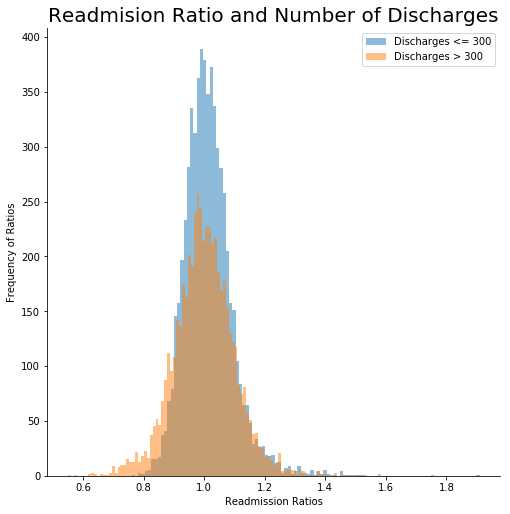

In [15]:
n_bins = int(np.sqrt(len(clean_hospital_df['Excess Readmission Ratio'])))
_ = sns.FacetGrid(clean_hospital_df,hue='Discharge_size', hue_order = ['Small','Large'], legend_out=True, height=7)
_.map(plt.hist,'Excess Readmission Ratio',bins=n_bins,alpha=.5)
_ = plt.title('Readmision Ratio and Number of Discharges',fontsize=20)
_ = plt.xlabel('Readmission Ratios')
_ = plt.ylabel('Frequency of Ratios')
plt.legend(('Discharges <= 300', 'Discharges > 300'), loc=1)
plt.show()

In [16]:
# Define Empirical Cumulative Distribution Function (ECDF) to compare multiple distributions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

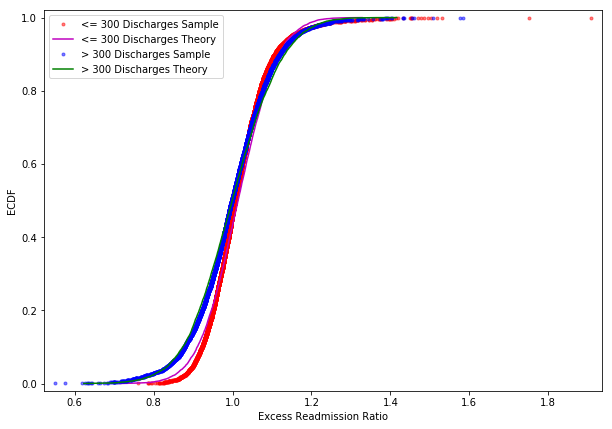

In [17]:
plt.figure(figsize=(10,7))
small_theory = np.random.normal(small_mean, small_std, size = 10000)

small_x, small_y = ecdf(small_df['Excess Readmission Ratio'])
small_theory_x, small_theory_y = ecdf(small_theory)

large_theory = np.random.normal(large_mean, large_std, size = 10000)

large_x, large_y = ecdf(large_df['Excess Readmission Ratio'])
large_theory_x, large_theory_y = ecdf(large_theory)

# Plotting these values to visualize similarities or differences
_ = plt.plot(small_x, small_y, marker='.', linestyle = 'none', color='r', alpha=0.5)
_ = plt.plot(small_theory_x, small_theory_y, color='m')
_ = plt.plot(large_x, large_y, marker='.', linestyle = 'none', color='b', alpha=0.5)
_ = plt.plot(large_theory_x, large_theory_y, color='g')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.legend(['<= 300 Discharges Sample', '<= 300 Discharges Theory', '> 300 Discharges Sample', '> 300 Discharges Theory'])
_ = plt.margins(0.02)
plt.show()

This graph shows that there is a difference between the two groups, however they both seem to follow the CDF distribution fairly closely. For the "Small number of discharges" group, we see a few outliers that have Excess Readmissioin Ratios above 1.7, and for the "Large number of discharges" group, we see 2 Excess Readmission Ratios' under 0.6, and a couple around 1.5. Let's look a little closer into these.

In [18]:
clean_hospital_df[(clean_hospital_df['Excess Readmission Ratio'] <= 0.6) | (clean_hospital_df['Excess Readmission Ratio'] >= 1.5)]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Discharge_size
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013,Small
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013,Small
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013,Small
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013,Small
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013,Small
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013,Large
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013,Large
13729,CHI HEALTH GOOD SAMARITAN,280009,NE,READM-30-HIP-KNEE-HRRP,843,NaN,0.5748,2.9,5.1,15.0,07/01/2010,06/30/2013,Large
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013,Large
13730,HOAG ORTHOPEDIC INSTITUTE,50769,CA,READM-30-HIP-KNEE-HRRP,2393,NaN,0.5495,2.7,4.9,54.0,07/01/2010,06/30/2013,Large


For now, we won't do anything with these outliers. It was useful to see these 10 that are a little outside the rest of the group. As it so happens, it looks like there are 5 outliers in each of the two groups, with the "small" group have an extremely high ratio of 1.9095, and the "large" group having the lowest ratio of 0.5495.

In [19]:
# We will now use bootstrapping to determine if our null hypothesis stands.
# We will use ttest_ind from scipy.stats, as the average Excess Readmission Ratios should be equal.
# The parameter equal_var needs to be set to false, as computed above, the groups do not have equal variances
t_stat, p_val = st.ttest_ind(small_df['Excess Readmission Ratio'], large_df['Excess Readmission Ratio'], equal_var = False)
print("The T-statistic for this data is: ", t_stat)
print("with a p-value of: ", p_val)

The T-statistic for this data is:  8.334507044495295
with a p-value of:  8.769147186155098e-17


## Report statistical significance for  𝛼  = .01.

Since the p-value that was calculated was 8.77 * 10^(-17), it is far below our 𝛼 value of .01, thus we should reject the null hypothesis.

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Due to the small p-value, we have shown the statistical significance, however the original recommendation to upgrade facilities would require further cost analysis. While larger hospitals definitely are shown to have a lower readmission ratio, the cost to upgrade these facilities may be more in the long run than the cost to treat the readmissions. Perhaps they could focus on splitting the budget to slowly upgrade the facilities, and to continue to treat those excess readmissions. Further cost analysis would allow to determine the amount of time needed to upgrade the facilities, while also leaving room in the budget to continue to treat the excess readmissions. 

## Look at the scatterplot above.
## What are the advantages and disadvantages of using this plot to convey information?

An advantage of the scatter plot is that is allows people to quickly view the data and get an idea of what may be going on. However, a disadvantage is that human perception can't be trusted, and the large clutter of dots can distract from the correlation that the greater number of discharges, the lower the Excess Readmission Ratio tends to be. 

## Construct another plot that conveys the same information in a more direct manner.

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


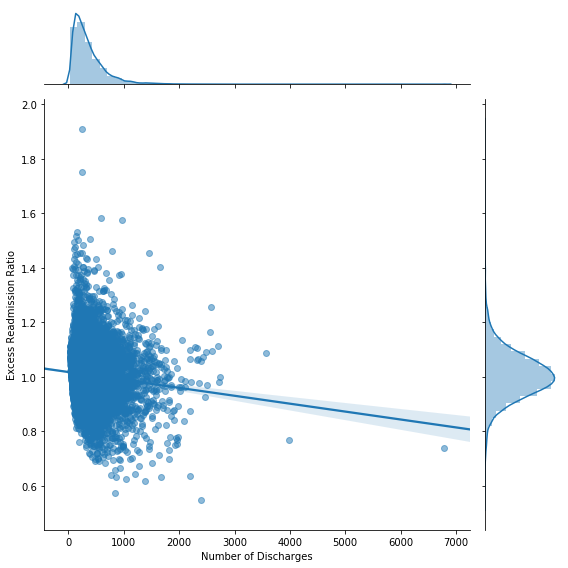

In [20]:
_ = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_df, kind = 'reg', height = 8, scatter_kws = {'alpha' : 0.5})
plt.show()